# 1. **Título**
### Previsão de Inadimplência de Crédito: **Análise e Modelagem de Risco**

# 2. Sobre o projeto

Neste projeto, analisamos um conjunto de dados de clientes de uma instituição financeira para identificar os fatores que contribuem para a inadimplência. Nosso objetivo é criar um modelo preditivo que ajude a instituição a identificar clientes em risco de inadimplência e tomar medidas preventivas.

# 3. Importando bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 4. Carregando dataset de crédido

In [ ]:
df = pd.read_csv('Python_M10_support material.csv', na_values = "na")
df.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


# 5. Etapa de exploração de dados

### 5.1 estruturação dos dados
verificando a estrutura dos dados

In [ ]:
print(df.shape)
print(df.dtypes)

(10127, 16)
id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object


### 5.2 Analise descritiva
verificando a proporção de clientes adimplenstes e inadimplentes, onde a coluna **'default'** nos indica a adimplencia ou inadimplencia de um cliente sedo **"default = 0"** clientes adimplentes e **"default = 1"** cliente inadimplente

In [ ]:
total_clientes , _ = df.shape # tupla do nosso dataframe
clientes_adimplentes , _ = df[df['default'] == 0].shape # tupla de clientes adimplentes
clientes_inadimplentes , _ = df[df['default'] == 1].shape # tupla de clientes inadimpletes

print(f'Proporção de clientes adimplentes {round(clientes_adimplentes / total_clientes * 100, 2)}%')
print(f'Proporção de clientes inadimplentes {round(clientes_inadimplentes / total_clientes * 100, 2)}%')

Proporção de clientes adimplentes 83.93%
Proporção de clientes inadimplentes 16.07%


> Já podemos perceber que na nossa base de dados o número dos nossos clientes inadimplentes é cerca de de 5 vezes menor que os clientes adimplentes.

### 5.3 Dados faltantes
Aqui iremos verificar as colunas com dados faltantes, e conseguimos visualizar que sas colunas: "escolaridade", "estado_civil", "salario_anual" existe ausência de dados.

In [ ]:
df.isna().any()

,0
id,False
default,False
idade,False
sexo,False
dependentes,False
escolaridade,True
estado_civil,True
salario_anual,True
tipo_cartao,False
meses_de_relacionamento,False


#### Atravez das função abaixo podemos ferificar algumas estatisticas dos dados faltantes:

In [ ]:
def proporcao_dados_faltantes(df: pd.DataFrame) -> None:
    status_dados_faltantes = []
    for colun in df.columns:
        if df[colun].isna().any():
            qtd = df[df[colun].isna()].shape[0]
            total = df.shape[0]
            dict_proporcao = {colun:{'Quantidade': qtd, 'Porcentagem': round(qtd / total * 100 , 2)}}
            status_dados_faltantes.append(dict_proporcao)

    for start in status_dados_faltantes:
        print(start)

In [ ]:
# proporção de dados faltantes total do data frame
proporcao_dados_faltantes(df = df)

{'escolaridade': {'Quantidade': 1519, 'Porcentagem': 15.0}}
{'estado_civil': {'Quantidade': 749, 'Porcentagem': 7.4}}
{'salario_anual': {'Quantidade': 1112, 'Porcentagem': 10.98}}


In [ ]:
# proporção de dados faltantes entre os clientes adimplentes
proporcao_dados_faltantes(df = df[df['default'] == 0])

{'escolaridade': {'Quantidade': 1263, 'Porcentagem': 14.86}}
{'estado_civil': {'Quantidade': 620, 'Porcentagem': 7.29}}
{'salario_anual': {'Quantidade': 925, 'Porcentagem': 10.88}}


In [ ]:
# proporção de dados faltantes entre os clientes inadimplentes
proporcao_dados_faltantes(df = df[df['default'] == 1])

{'escolaridade': {'Quantidade': 256, 'Porcentagem': 15.73}}
{'estado_civil': {'Quantidade': 129, 'Porcentagem': 7.93}}
{'salario_anual': {'Quantidade': 187, 'Porcentagem': 11.49}}


> Conseguimos verificar que a proporção de dados faltantes tanto dos clientes adimplentes, quanto clientes inadimplentes, não orcila tanto quando comparado a quantidade de dados faltantes total, isso significa que ainda se fossemos excluir as linhas com dados faltantes, isso não iria ter um impacto tão grande no nosso dateset devido a proporção ser similar.

# 6. Transformação e limpeza de dados

Aqui nós iremos corrigir o schema e remover os dados faltantes

In [ ]:
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


> coseguimos analizar que no nosso dataframe existem algumas colunas que deveriam ser 'number' mas são 'object'como é o caso de 'limite_credito' e 'valor_transacoes_12m'

In [ ]:
df[['limite_credito' , 'valor_transacoes_12m']] # visualizar colunas

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"
...,...,...
10122,"4.003,91","15.476,26"
10123,"4.277,04","8.764,88"
10124,"5.409,16","10.291,78"
10125,"5.281,84","8.395,62"


> cosequimos ver que as duas colunas precisarão ser formatadas para possamos transforma-las em um tipo float, 5.281,84 -> 5281.84

### 6.1 correção do schema

In [ ]:
df['limite_credito'] = df['limite_credito'].apply(lambda x : float(x.replace('.','').replace(',','.')))
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda x : float(x.replace('.','').replace(',','.')))

### 6.2 Dropando dados nulos

In [ ]:
df.dropna(inplace = True) # excluindo as linhas com dados faltantes, em seguidad vamos ver o impacto que isso isso teve em nossa base de dados


In [ ]:
novos_adimplentes = df[df['default'] == 0].shape[0]
novos_inadimplentes = df[df['default'] == 1].shape[0]
nova_qtd = df.shape[0]

print(f'Nova proporção de clientes adimplentes {round( novos_adimplentes / nova_qtd * 100 ,2)}')
print(f'proporçao original de clientes adimplentes {round( clientes_adimplentes / total_clientes * 100 ,2)}')
print(f'Nova proporção de clientes inadimplentes {round( novos_inadimplentes / nova_qtd * 100 ,2)}')
print(f'proporçao original de clientes inadimplentes {round( clientes_inadimplentes / total_clientes * 100 ,2)}')

Nova proporção de clientes adimplentes 84.28
proporçao original de clientes adimplentes 83.93
Nova proporção de clientes inadimplentes 15.72
proporçao original de clientes inadimplentes 16.07


> podemos verificar que a proporção do default permanasse bassicamente a mesma

# 7. Etapa de visualização de dados

In [ ]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

<ipython-input-18-1df7f46656cb>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eixos[eixo].set_xticklabels(eixos[eixo].get_xticklabels(), rotation=90)
<ipython-input-18-1df7f46656cb>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eixos[eixo].set_xticklabels(eixos[eixo].get_xticklabels(), rotation=90)
<ipython-input-18-1df7f46656cb>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eixos[eixo].set_xticklabels(eixos[eixo].get_xticklabels(), rotation=90)


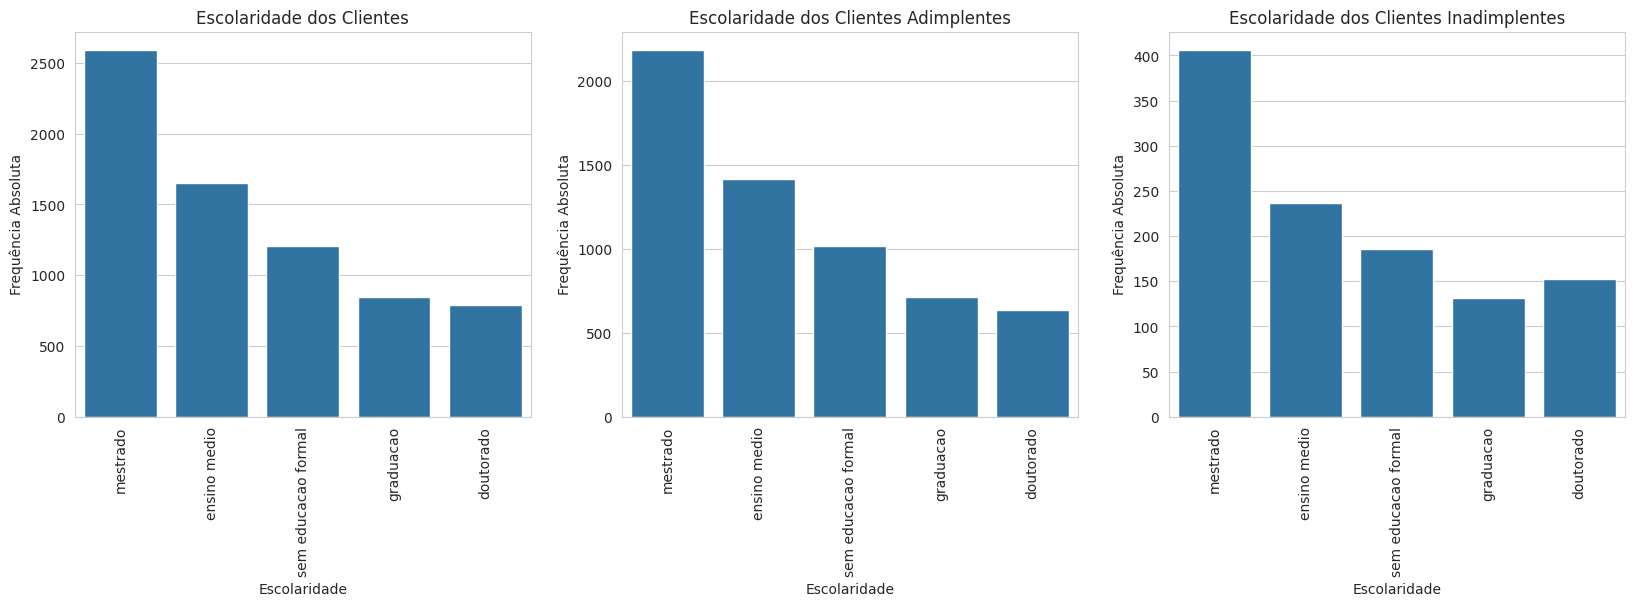

In [ ]:
sns.set_style("whitegrid")
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for eixo, dataframe in enumerate([df, df[df['default'] == 0], df[df['default'] == 1]]):
    sns.barplot(x=dataframe[coluna].value_counts().index, y=dataframe[coluna].value_counts().values, ax=eixos[eixo])
    eixos[eixo].set_title(titulos[eixo])
    eixos[eixo].set_xlabel(coluna.capitalize())
    eixos[eixo].set_ylabel('Frequência Absoluta')
    eixos[eixo].set_xticklabels(eixos[eixo].get_xticklabels(), rotation=90)
figura.show()

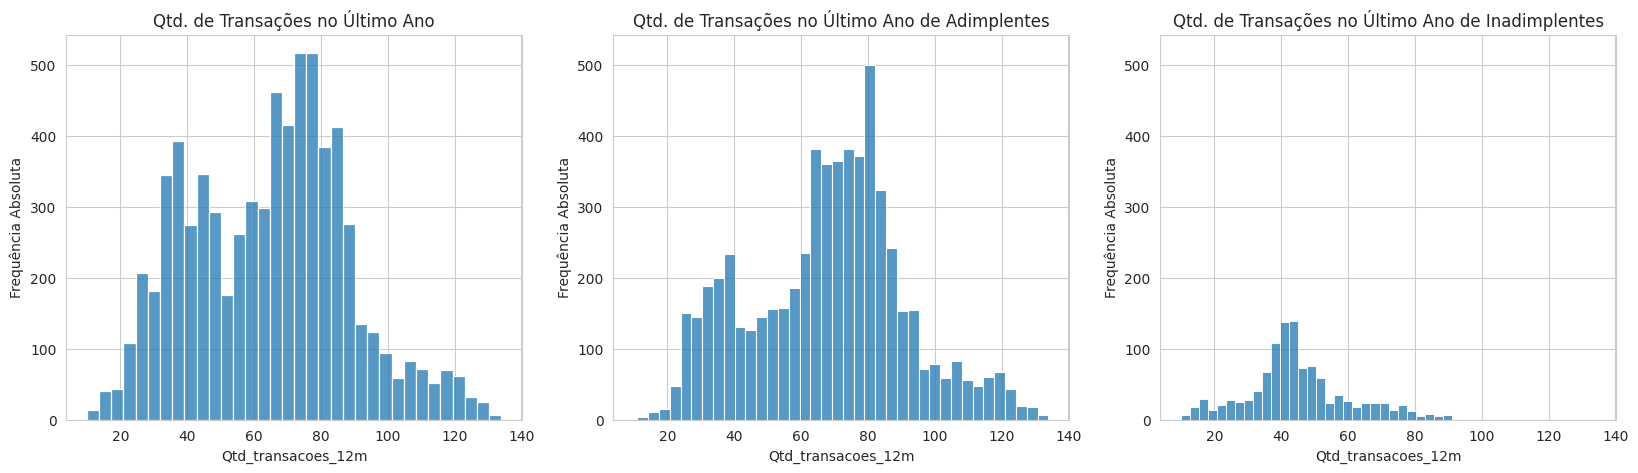

In [ ]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

figura.show()

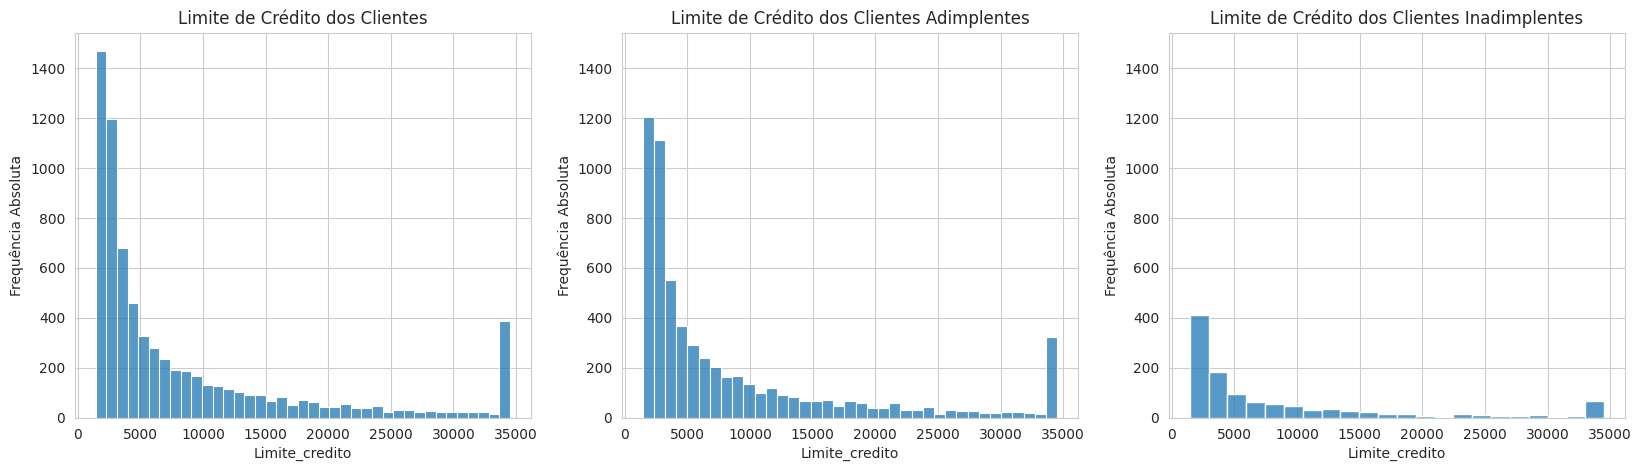

In [ ]:
coluna = 'limite_credito'
titulos = ['Limite de Crédito dos Clientes', 'Limite de Crédito dos Clientes Adimplentes', 'Limite de Crédito dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

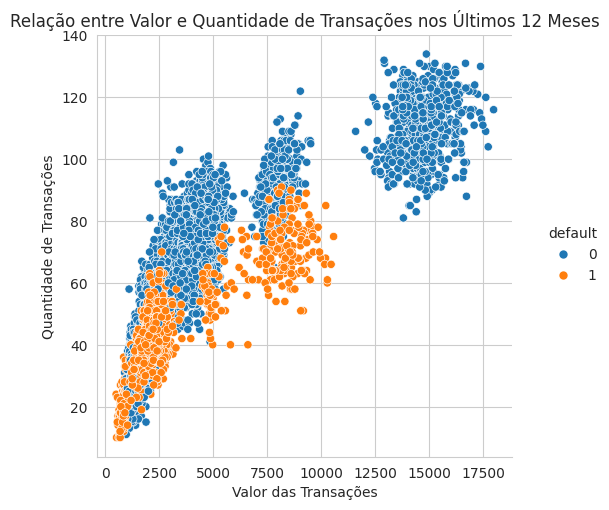

In [ ]:
sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
plt.title('Relação entre Valor e Quantidade de Transações nos Últimos 12 Meses')
plt.xlabel('Valor das Transações')
plt.ylabel('Quantidade de Transações')
plt.show()

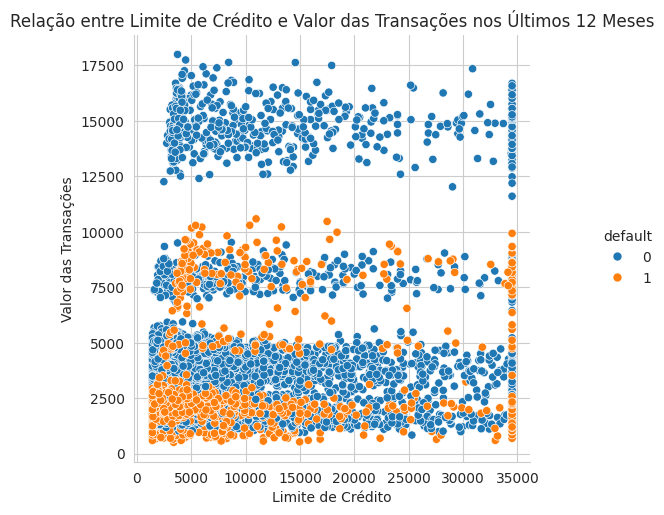

In [ ]:
sns.relplot(x='limite_credito', y='valor_transacoes_12m', data=df, hue='default')
plt.title('Relação entre Limite de Crédito e Valor das Transações nos Últimos 12 Meses')
plt.xlabel('Limite de Crédito')
plt.ylabel('Valor das Transações')
plt.show()

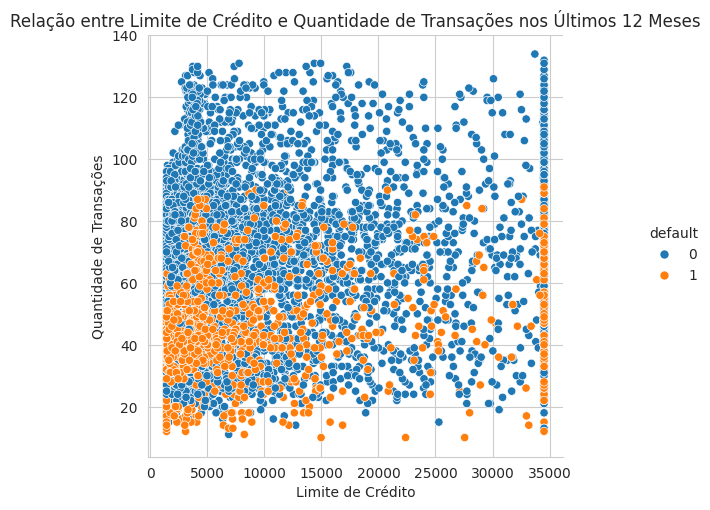

In [ ]:
sns.relplot(x='limite_credito', y='qtd_transacoes_12m', data=df, hue='default')
plt.title('Relação entre Limite de Crédito e Quantidade de Transações nos Últimos 12 Meses')
plt.xlabel('Limite de Crédito')
plt.ylabel('Quantidade de Transações')
plt.show()

Conseguimos visualizar onde geralmente o default 0 ocorre e assim podemos tomar medidas prefentivas.

## Tratando dados para criar modedo de arvore de classificação

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7081 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7081 non-null   int64  
 1   default                  7081 non-null   int64  
 2   idade                    7081 non-null   int64  
 3   sexo                     7081 non-null   object 
 4   dependentes              7081 non-null   int64  
 5   escolaridade             7081 non-null   object 
 6   estado_civil             7081 non-null   object 
 7   salario_anual            7081 non-null   object 
 8   tipo_cartao              7081 non-null   object 
 9   meses_de_relacionamento  7081 non-null   int64  
 10  qtd_produtos             7081 non-null   int64  
 11  iteracoes_12m            7081 non-null   int64  
 12  meses_inativo_12m        7081 non-null   int64  
 13  limite_credito           7081 non-null   float64
 14  valor_transacoes_12m     708

In [ ]:
df1 = df.copy()

In [ ]:
def process_categorical_columns(df):
    for col in df.columns:
        # Verifica se a coluna é categórica (tipo 'object') e tem exatamente dois valores únicos
        if (df[col].dtype == 'object') and (len(df[col].unique()) == 2):
            unique_values = df[col].unique()
            # Mapeia os dois valores para 1 e 0
            df[col] = df[col].map({unique_values[0]: 0, unique_values[1]: 1 }).astype('int64')
        # Verifica se a coluna é categórica com mais de dois valores únicos
        elif df[col].dtype == 'object':
            # Exibe a coluna e seus valores únicos antes de transformar em dummie
            df = pd.get_dummies(df,columns=[col], drop_first=True)
        elif df[col].dtypes == 'bool':
            df[col] = df[col].astype('int64')
    return df

In [ ]:
df1 = process_categorical_columns(df1)

In [ ]:
for col in df1.columns:
  if df1[col].dtypes == 'bool':
            df1[col] = df1[col].astype('int64')


In [ ]:
df1

,id,default,idade,sexo,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,...,escolaridade_sem educacao formal,estado_civil_divorciado,estado_civil_solteiro,salario_anual_$40K - $60K,salario_anual_$60K - $80K,salario_anual_$80K - $120K,salario_anual_menos que $40K,tipo_cartao_gold,tipo_cartao_platinum,tipo_cartao_silver
0,768805383,0,45,0,3,39,5,3,1,12691.51,...,0,0,0,0,1,0,0,0,0,0
1,818770008,0,49,1,5,44,6,2,1,8256.96,...,0,0,1,0,0,0,1,0,0,0
2,713982108,0,51,0,3,36,4,0,1,3418.56,...,0,0,0,0,0,1,0,0,0,0
4,709106358,0,40,0,3,21,5,0,1,4716.22,...,1,0,0,0,1,0,0,0,0,0
5,713061558,0,44,0,2,36,3,2,1,4010.69,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,0,54,0,1,34,5,0,2,13940.62,...,0,0,1,0,1,0,0,0,0,0
10121,713899383,0,56,1,1,50,4,4,1,3688.95,...,0,0,1,0,0,0,1,0,0,0
10122,772366833,0,50,0,2,40,3,3,2,4003.91,...,0,0,1,1,0,0,0,0,0,0
10124,716506083,1,44,1,1,36,5,4,3,5409.16,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7081 entries, 0 to 10126
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                7081 non-null   int64  
 1   default                           7081 non-null   int64  
 2   idade                             7081 non-null   int64  
 3   sexo                              7081 non-null   int64  
 4   dependentes                       7081 non-null   int64  
 5   meses_de_relacionamento           7081 non-null   int64  
 6   qtd_produtos                      7081 non-null   int64  
 7   iteracoes_12m                     7081 non-null   int64  
 8   meses_inativo_12m                 7081 non-null   int64  
 9   limite_credito                    7081 non-null   float64
 10  valor_transacoes_12m              7081 non-null   float64
 11  qtd_transacoes_12m                7081 non-null   int64  
 12  escolarida

In [ ]:
metadados = pd.DataFrame(df1.dtypes, columns=['tipo_dado'])

qtd_categorias = []
for col in df1.columns:
    qtd_categorias.append(df1[col].unique())

metadados['qtd_categorias'] = qtd_categorias
metadados

,tipo_dado,qtd_categorias
id,int64,"[768805383, 818770008, 713982108, 709106358, 7..."
default,int64,"[0, 1]"
idade,int64,"[45, 49, 51, 40, 44, 37, 48, 56, 57, 61, 47, 6..."
sexo,int64,"[0, 1]"
dependentes,int64,"[3, 5, 2, 1, 4, 0]"
meses_de_relacionamento,int64,"[39, 44, 36, 21, 48, 56, 42, 49, 33, 28, 38, 4..."
qtd_produtos,int64,"[5, 6, 4, 3, 2, 1]"
iteracoes_12m,int64,"[3, 2, 0, 1, 4, 5, 6]"
meses_inativo_12m,int64,"[1, 2, 3, 6, 0, 5, 4]"
limite_credito,float64,"[12691.51, 8256.96, 3418.56, 4716.22, 4010.69,..."


## Separando variavel resposta de variavel explicativa

In [ ]:
x = df1.drop('default', axis=1)
y = df1['default']

## Classificando arvore de treinamento e de teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

In [ ]:
clf = DecisionTreeClassifier(random_state=100) # objeto com da arvore de decisão
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=100)

### Visão da arvore







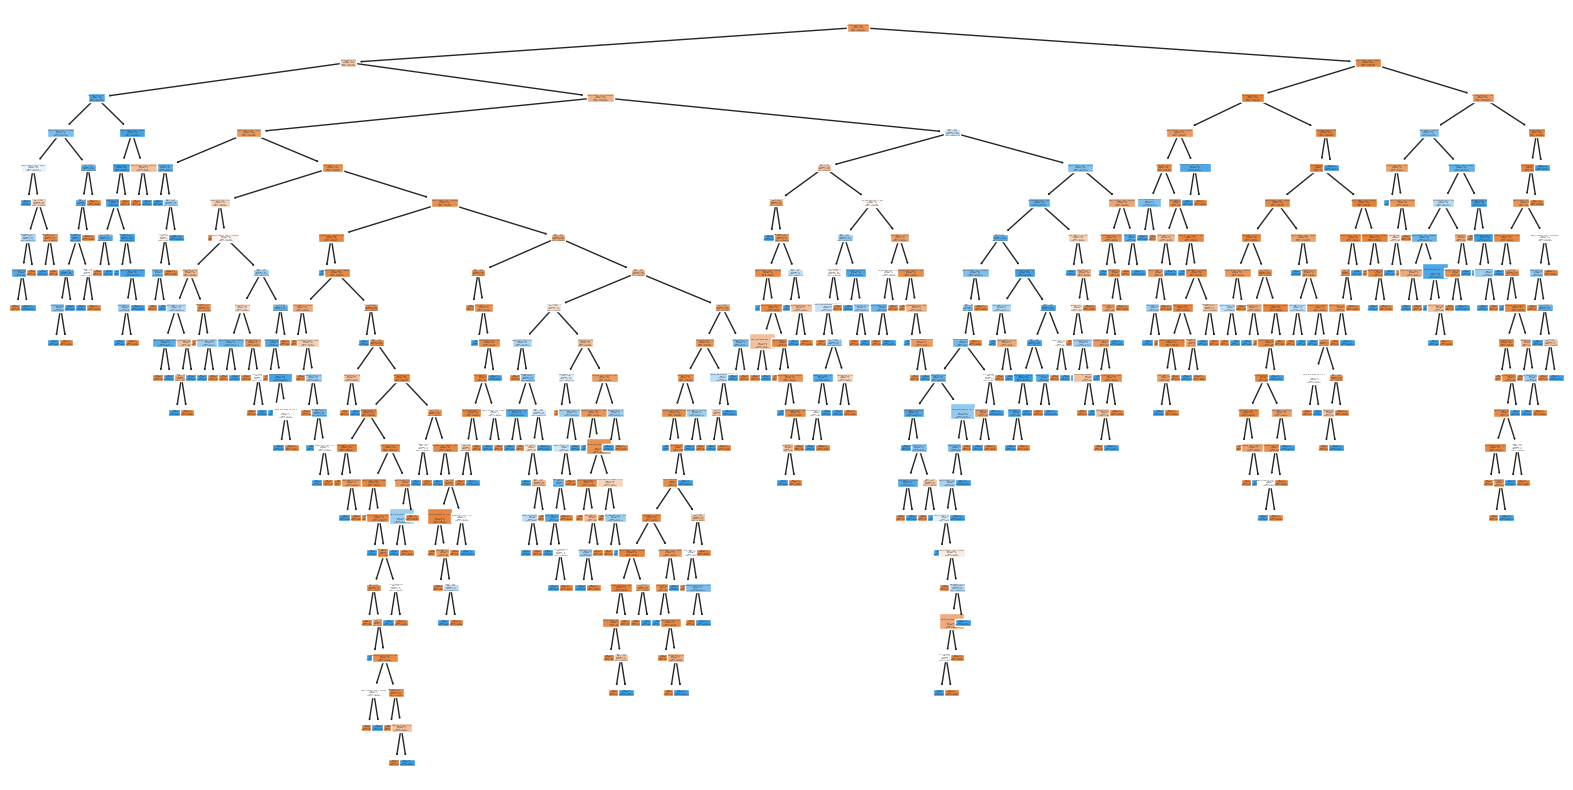

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf,
          class_names=['adimplente', 'inadimplente'],
          feature_names=x_train.columns,
          filled=True)
plt.show()

### Matriz de confusão e acuracia

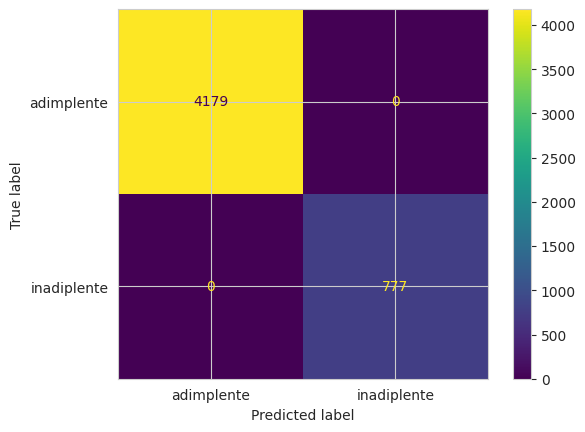

In [ ]:
y_pred_train = clf.predict(x_train)
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['adimplente','inadiplente'] )
disp.plot()
plt.show()

In [ ]:
clf.score(x_train, y_train)

0.8432203389830508

In [ ]:
clf.fit(x_test, y_test)

DecisionTreeClassifier(ccp_alpha=0.04403315607983141, random_state=0)

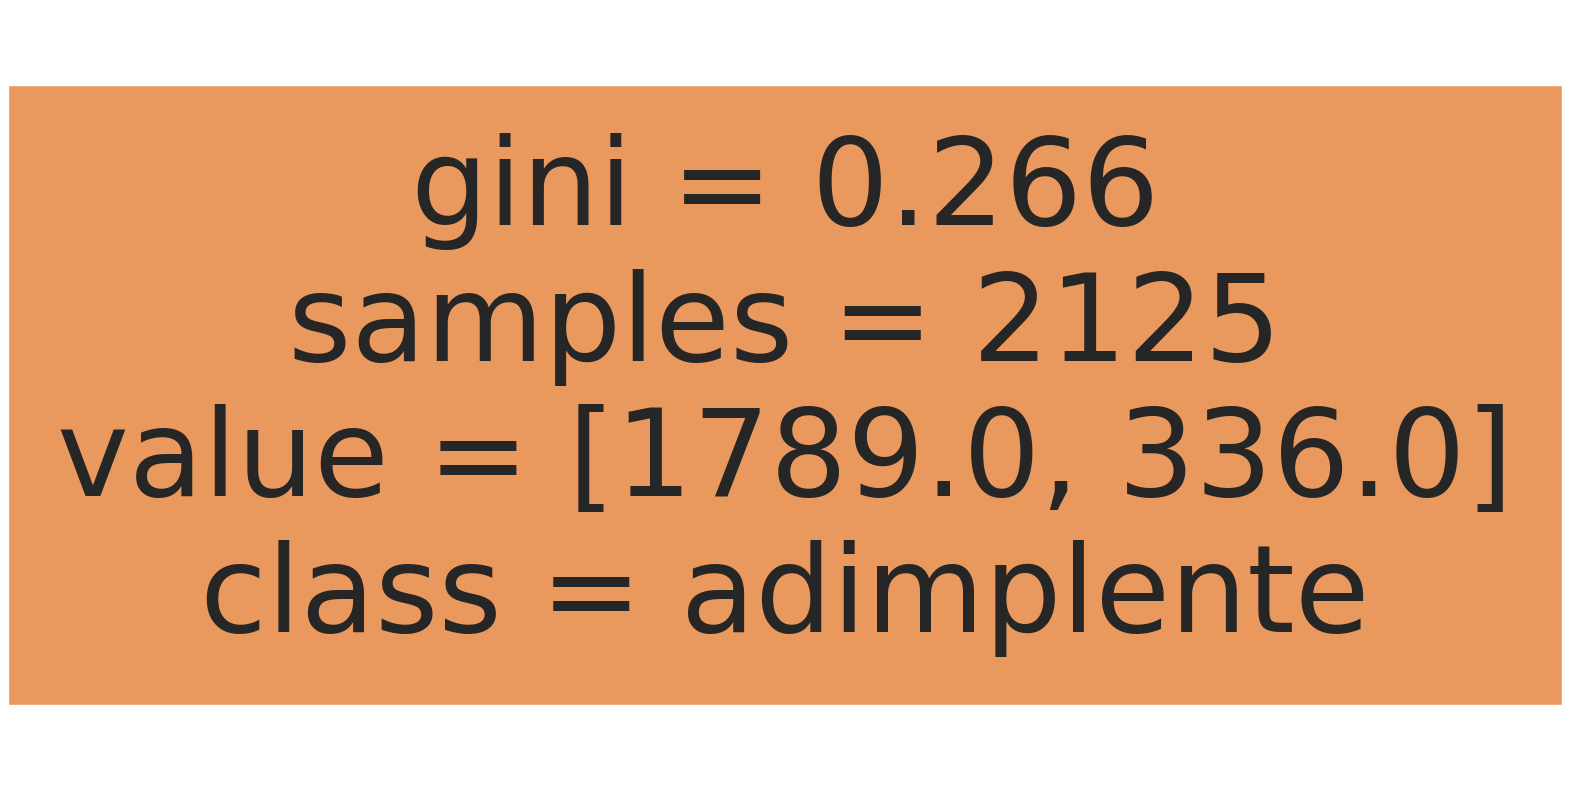

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf,
          class_names=['adimplente', 'inadimplente'],
          feature_names=x_test.columns,
          filled=True)
plt.show()

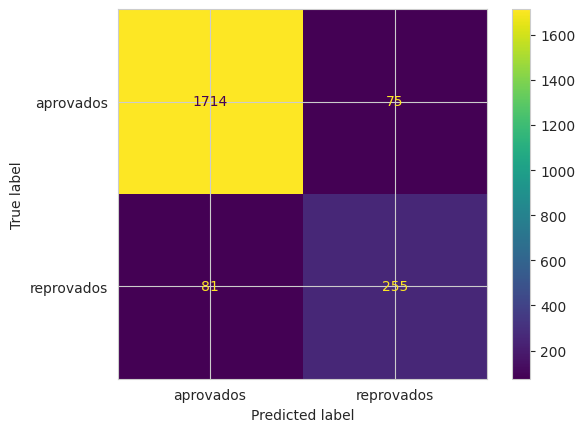

In [ ]:
clf2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf2.fit(x_train, y_train)

# Matriz de confusão para a nova árvore
y_pred2 = clf2.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['aprovados', 'reprovados'])
disp2.plot()
plt.show()


In [ ]:
clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(x_train,y_train) # da o caminho para as quebras
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(x_train,y_train)
  clfs.append(clf)

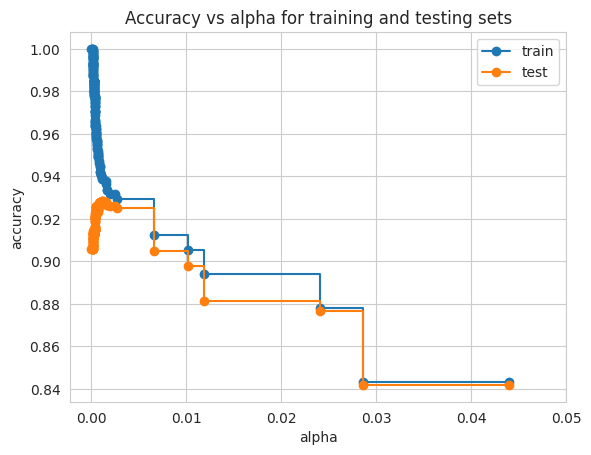

In [ ]:
train_scores = [clf.score(x_train,y_train) for clf in clfs]
test_scores = [clf.score(x_test,y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()

# Define os ticks do eixo x e os rótulos
ticks = np.arange(0, max(ccp_alphas) + 0.01, 0.01)
labels = [f'{tick:.2f}' for tick in ticks]
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

plt.show()

In [ ]:
df_alpha = pd.DataFrame({'alpha':ccp_alphas.tolist(), 'impurities':impurities.tolist()})
df_alpha[(df_alpha['alpha']<0.03)&(df_alpha['alpha']>0.02)]

,alpha,impurities
149,0.024059,0.191795
150,0.028571,0.220366


In [ ]:
clf_podada = DecisionTreeClassifier(random_state=100, ccp_alpha=0.028571)
clf_podada.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.028571, random_state=100)